In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import math
from numpy.random import rand

## 2.6.1
本節のニュートン法コードで，$\sin u = 0$を$u^{k+1} = u^k - \sin u^k / \cos u^k$ として解く．  
どの区間の出発地$u^0$から，どの解$u^* = n\pi$が得られるか？  
N個の等間隔に分布した点$u^0 = (1:N)\pi/N$から反復を出発させてみよ．

### 解答

In [45]:
N = 10000
epsilon = 1.0e-15
x = np.linspace(0, np.pi, N)
u_ans = []

for i in range(N):
    u_old = -1
    u_new = x[i]
    while (u_new - u_old) > epsilon:
        u_old = u_new
        u_new = u_new - np.sin(u_new)/np.cos(u_new)
    u_ans.append(u_new)

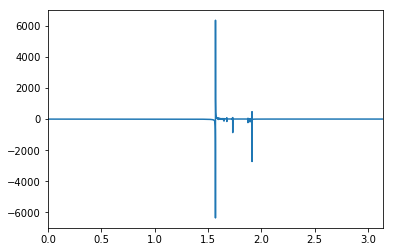

In [46]:
plt.plot(x, u_ans)
plt.xlim(0, np.pi)
plt.show()

#### 0 < $u_0$ < $\pi$/2のとき

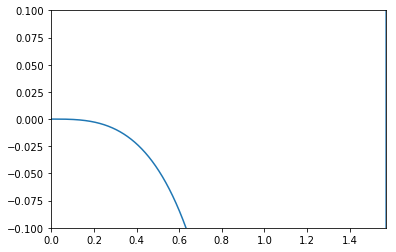

In [47]:
plt.plot(x, u_ans)
plt.xlim(0, np.pi/2)
plt.ylim(-0.1, 0.1)
plt.show()

#### $\pi$/2 < $u_0$ < $\pi$のとき

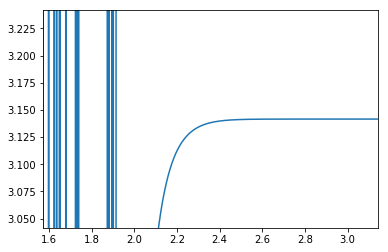

In [49]:
plt.plot(x, u_ans)
plt.xlim(np.pi/2, np.pi)
plt.ylim(np.pi-0.1, np.pi+0.1)
plt.show()

## 2.6.2
$u^2 - a = 0$に対するニュートン法は，$u^k$と$a/u^k$の平均として$u^{k+1}$を求めることを示せ．  
次のようにして，新しい誤差$u^{k+1} - \sqrt{a}$を，前の誤差$u^k - \sqrt{a}$の平方と結びつけよ．

$$
u^{k+1} - \sqrt{a} = \frac{1}{2}(u^k + \frac{a}{u^k}) - \sqrt{a} = (u^k-\sqrt{a})^2/2u^k
$$

### 解答

$g(u_k)=u_k^2-a$を考えたとき，$g'(u_k) = 2u_k$である．  
そこでニュートン法を考えると，$J(u_k)(u_{k+1}-u_k) = -g(u_k)$であるので

$$
\begin{align}
2u_k(u_{k+1}-u_k) &= -(u_k^2-a) \\
2u_ku_{k+1} &= u_k^2 + a \\
u_{k+1} &= \frac{u_k + \frac{a}{u_k}}{2}
\end{align}
$$

以上より，$u_{k+1}$が$u_k$と$a/u_k$の平均として計算可能であることが示された．  
  
さらに前の誤差$u_k - \sqrt{a}$と新しい誤差を結びつけると，上にあるように2次収束となることが示される．

## 2.6.3
根$u^* = 1, \ldots, N$を持つ高次多項式$g(u) = (u-1)\ldots(u-N)$で，fzeroとrootsと我々のニュートン法を試せ．  
rootsの与える解は，どのNから複素数となる(完全な誤り)か？

### 解答

fzero, rootsは省略させてください・・・．  

一次微分$J(u) = \sum^N_{k=1} \frac{(u-1)\ldots(u-N)}{(u-k)}$であり，  
ニュートン法の式，$J(u_k)(u_{k+1}-u_k) = -g(u_k)$を考える．

$$
\begin{align}
u_{k+1} &= u_k - g(u_k)/J(u_k) \\
u_{k+1} &= u_k - \frac{(u-1)\ldots(u-N)}{\frac{(u-1)\ldots(u-N)}{u-1}+\ldots+\frac{(u-1)\ldots(u-N)}{u-N}}
\end{align}
$$

In [59]:
N = 10
epsilon = 1.0e-15
x = np.linspace(0, N+1, 1000)
u_ans = []

for i in range(len(x)):
    u_old = -1
    u_new = x[i]
    while (u_new - u_old) > epsilon:
        g = 1
        J = 0

        for j in range(N):
            g *= u_new-(j+1)

        for j in range(N):
            J_parts = 1
            for k in range(N):
                if k != j:
                    J_parts *= (u_new - (k+1))
            J += J_parts
        u_old = u_new
        u_new = u_new - g/J
    u_ans.append(u_new)

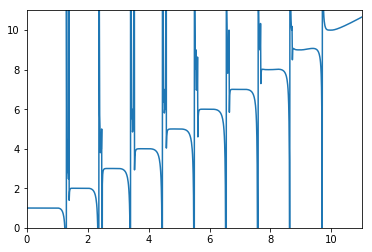

In [62]:
plt.plot(x, u_ans)
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.show()

## 2.6.4
$g(u) = 0$に対する最も簡単な不動点反復は，$u^{k+1} = H(u^k) = u^k - g(u^k)$である．  
$g(u) = au - b$ のとき，$u^0 = 1$から始めて，$u^1，u^2$と各$u^k$を求める．  
どのような$a$の値ならば，$u^k$が正解$u^* = b/a$に収束するか？

### 解答

$u_{k},u_{k+1}$と正解$u^*=b/a$の誤差を考える．  
不動点反復の計算をすると

$$
\begin{align}
u_{k+1} &= u_{k} - g(u_k) \\
u_{k+1} &= u_{k} - (au_k-b) \\
u_{k+1} - \frac{b}{a} &= u_{k} - (au_k-b) -\frac{b}{a} \\
u_{k+1} - \frac{b}{a} &= (1-a)(u_k -\frac{b}{a})
\end{align}
$$

以上より，不動点反復をする度に誤差が$(1-a)$倍になっている事がわかった．  
つまり収束のためには，

$$
-1 < 1-a < 1 \\
0 < a < 2
$$

## 2.6.5
ベクトル版の$g(u) = Au - b$の場合，ニュートン法は1ステップで収束すること，つまり$u^1 = A^{-1}b$であることを示せ．  
不動点反復$u^{k+1} = H(u^k) = u^k - (Au^k - b)$では$H' = I - A$である．その収束因子は，最大固有値$|1 - \lambda(A)|$である．

### 解答

## 2.6.6
$g(u) = ue^{-u}$のグラフをプロットせよ．ニュートン法の2ステップをこの上に描け．  
すなわち，$u^0$での接線を描き，それが軸と交わった点が$u^1$である($u^1$と$u^2$も同様の関係)．$u^0 = \frac{1}{2}$と$u^0 = 1$から始める場合をやってみよ．

### 解答

## 2.6.7
$g_1 = u_1^3 - u_2 = 0$と$g_2 = u_2^3 - u_1 = 0$に対する$2 \times 2$のニュートン法のコードを書け．  
この方程式は3個の実解 $(1,1), (0,0), (-1, -1)$を持つ．  
吸引領域(フラクタルになる)を色分けすることができるか？3個の解と無限大とに導く出発点$(u_1^0, u_2^0)$の4集合を色分けするのである．

### 解答

まずヤコビ行列$J$の計算を行う．

$$
\begin{align}
J_{ij} &= \frac{\partial g_i}{\partial u_j} \\
J &= \begin{pmatrix}3u_1^2 & -1 \\ -1 & 3u_2^2\end{pmatrix}
\end{align}
$$

そしてニュートン法は，$J(u_k)(u_{k+1}-u_k) = -g(u_k)$であった．つまり，

$$
\begin{pmatrix}3u_1[k]^2 & -1 \\ -1 & 3u_2[k]^2\end{pmatrix}\begin{pmatrix}u_1[k+1]-u_1[k] \\ u_2[k+1]-u_2[k]\end{pmatrix} = - \begin{pmatrix}u_1[k]^3 - u_2[k] \\ u_2[k]^3 - u_1[k]\end{pmatrix}
$$

$$
\begin{pmatrix}u_1[k+1] \\ u_2[k+1]\end{pmatrix} = \begin{pmatrix}u_1[k] \\ u_2[k]\end{pmatrix} - \begin{pmatrix}3u_1[k]^2 & -1 \\ -1 & 3u_2[k]^2\end{pmatrix}^{-1}\begin{pmatrix}u_1[k]^3 - u_2[k] \\ u_2[k]^3 - u_1[k]\end{pmatrix}
$$

In [16]:
x_range = np.linspace(-2, 2, 200)
y_range = np.linspace(-2, 2, 200)
x_num = np.arange(200)
y_num = np.arange(200)
epsilon = 1.0e-15
ite_num = 100

color_map = np.zeros((200,200,3))

for x_n in x_num:
    for y_n in y_num:
        x = x_range[x_n]
        y = y_range[y_n]
        u_new = np.array([x,y])
        u_old = np.array([3,3])
        iteration = 0
        try:
            while (np.linalg.norm(u_new-u_old) > epsilon and iteration < ite_num):
                A = np.array([[3*u_new[0]*u_new[0], -1], [-1, 3*u_new[1]*u_new[1]]])
                b = np.array([u_new[0]*u_new[0]*u_new[0]-u_new[1], u_new[1]*u_new[1]*u_new[1]-u_new[0]])
                u_old = u_new
                u_new = u_new - np.dot(np.linalg.inv(A),b)
                iteration += 1
                
            if np.linalg.norm(u_new-np.array([1,1])) < 0.1:
                color_map[y_n,x_n,:] = [1,0,0]
            elif np.linalg.norm(u_new-np.array([0,0])) < 0.1:
                color_map[y_n,x_n,:] = [0,1,0]
            elif np.linalg.norm(u_new+np.array([1,1])) < 0.1:
                color_map[y_n,x_n,:] = [0,0,1]
        except:
            pass

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


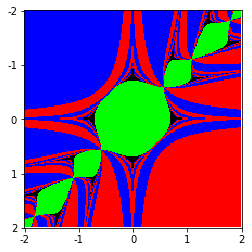

In [17]:
plt.imshow(color_map)
plt.xticks([0,50,100,150,200], [-2, -1, 0, 1, 2])
plt.yticks([0,50,100,150,200], [-2, -1, 0, 1, 2])
plt.show()

綺麗にできました．

## 2.6.8
$P_N(z) = 1+z+\ldots+z^N/N!$は，$e^z$に対する級数展開を打ち切って得られる多項式である．  
$P_N(z) = 0$をrootsを使って$N = 20, 40,\ldots$に対して解き，解$z = u+iv$をプロットせよ．  
2個の連立実方程式$ReP_N(u,v) = ImP_N(u,v) = 0$をニュートン法で解くことも試せ．

### 解答

## 2.6.9
$g_1 = u_1 + \sin u_2 = 0，g_2 = u_1\cos u_2 + u_2 = 0$に対するヤコビ行列$\partial g_1/\partial u_j$を求めよ．  
$J$が対称ならば，勾配を$g(u)$とする関数$P(u)$を求めよ．

### 解答

言われるがままに微分をします．

$$
J = \begin{pmatrix}1 & \cos{u_2}\\ \cos{u_2} & 1-u_1\sin{u_2}\end{pmatrix}
$$

関数$P(u)$の一回微分(勾配)が$g(u)$で，二回微分(ヘッシアン)が$J$であるので，$g(u)$を積分することで$P(u)$は求めることができる．ゆえに  

$$
P(u) = \frac{1}{2}u_1^2+2u_1\sin{u_2}+\frac{1}{2}u_2^2+C
$$

## 2.6.10
最急降下法で$u^{k+1}$が$P(u^k - \alpha g(u^k))$を最小化するとする．  
$u^0 = (2,1)$として，問題9にこれを適用せよ．$(u_1^*,u_2^*)$における$\lambda_{max}(J)$に基づく収束率は何か？

### 解答

## 2.6.11
$u = 2u - 2u^2 = H(u)$の解たちは何か？  
$u^0 = 1/4$から不動点反復$u^{k+1} = H(u^k)$を出発させると，極限$u^*$は何で，収束率$c = H'(u^*)$は何か？

### 解答

$$
\begin{align}
u = 2u - 2u^2 &= H(u)\\
u(2u-1) &= 0
\end{align}
$$

よって解は$0, \frac{1}{2}$である．

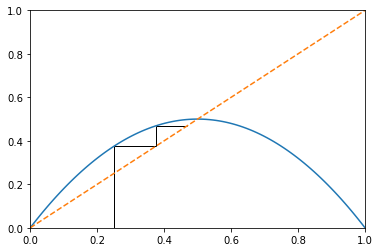

In [16]:
x = np.linspace(0,1, 100)
plt.plot(x, 2*x-2*x*x)
plt.plot(x,x, "--")
plt.vlines(x=0.25,ymin=0,ymax=0.375,lw=1)
plt.hlines(y=0.375, xmin=0.25, xmax=0.375,lw=1)
plt.vlines(x=0.375,ymin=0.375,ymax=15.0/32,lw=1)
plt.hlines(y=15.0/32, xmin=0.375, xmax=15.0/32,lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

上の図より，$u_0 = \frac{1}{4}$からスタートさせたとき，$u^* = \frac{1}{2}$に収束することがわかる．  
またそのときの$H'(u^*)$を考えると，$H'(u) = 2 - 4u$であるので，

$$
\begin{align}
H'(u^*) &= 2 - 4 \times \frac{1}{2} \\
&= 0
\end{align}
$$

## 2.6.12
$H(u) = au - au^2$に対して，$a > 3$のとき，次のようにして$u^{k+1} = H(u^k)$の振舞いを試せ．  
a = 3.2に対して，偶数番の$u^{2k}$と奇数番の$u^{2k+1}$は異なる極限を持つ(周期2)  
a = 3.46に対して，$u^{4k}，u^{4k+1}，u^{4k+2}，u^{4k+3}$から生ずる4個の極限がある  
a = ...に対しては，8個の異なる極限がある  
a = ... < 4に対しては，$u^k$はカオス的になる

### 解答

まず$a = 3.2$のとき，

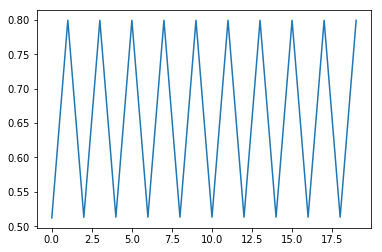

In [22]:
u_values = []
u = 0.2
for i in range(20):
    u = 3.2*u-3.2*u*u
    u_values.append(u)


plt.plot(u_values)
plt.show()

$a = 3.46$のとき

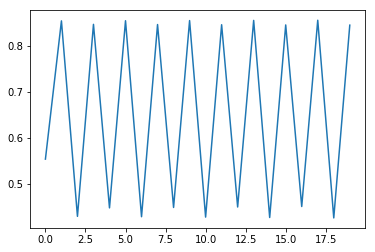

In [26]:
u_values = []
u = 0.2
for i in range(20):
    u = 3.46*u-3.46*u*u
    u_values.append(u)

plt.plot(u_values)
plt.show()

## 2.6.13
マンデルブロ集合$M$とは，不動点反復$u^{k+1} = (u^k)^2 + c$ (u^0 = 0から始まる)が有界に留まる複素数全体である．  
$M$のフラクタル境界は美しい．この境界に近く，$M$の内部にある100個の$c$をプロットせよ．

### 解答

## 2.6.14
$f' = \partial f / \partial u$ならば，分割ステップ(15)におけるヤコビ行列は

$$
J_{TR} = I - c \Delta tf'/2，J_{BDF} = I - (1-c)\Delta tf'/A
$$

である．$c = 2 - \sqrt{2}$($c$の最適値)のとき$J_{TR} = J_{BDF}$であることを示せ．

### 解答

## 2.6.15
$u' = au$に対して，$a\Delta t = z$とおいて，分割ステップ法(15)における$U_{n+c}$と$U_{n+1}$を求めよ．  
$U_{n+1} = GU_n$における増大度因子は (zの1次項) / (zの2次項)である．  
難問：局所誤差$e^z - G(z)$における$z^3$の係数は何か？$c = 2 - \sqrt{2}$がこの係数を最小にすることを証明できるか？

### 解答